<a href="https://colab.research.google.com/github/sharavana07/ACE_Hack/blob/main/EXP_5(c).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy (RBF Kernel): 0.75
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        14
           1       0.56      0.83      0.67         6

    accuracy                           0.75        20
   macro avg       0.73      0.77      0.73        20
weighted avg       0.80      0.75      0.76        20



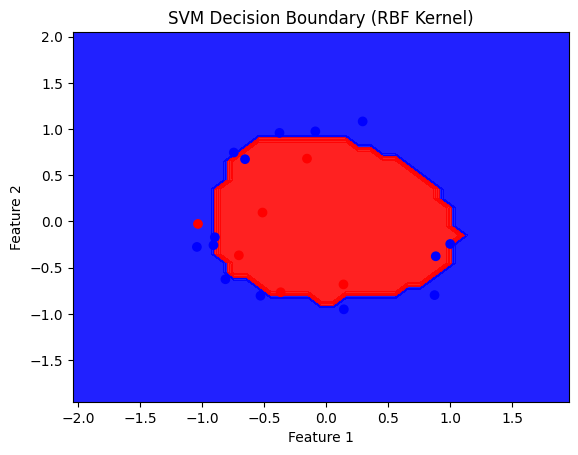

In [7]:
# ==============================
# EXP 5(c)(a): Implement SVM using RBF Kernel
# ==============================

import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Step 1: Generate Non-Linearly Separable Data
X, y = make_circles(n_samples=100, noise=0.1, random_state=42)

# Step 2: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train SVM with RBF Kernel
model_rbf = SVC(kernel='rbf', gamma='scale', C=1.0)
model_rbf.fit(X_train, y_train)

# Step 4: Evaluate
y_pred = model_rbf.predict(X_test)
print(f"Accuracy (RBF Kernel): {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Step 5: Visualization
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.87, cmap=ListedColormap(('blue', 'red')))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(('blue', 'red')))
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.show()

plot_decision_boundary(model_rbf, X_test, y_test, "SVM Decision Boundary (RBF Kernel)")
